# <font color=darkred>Laboratory 28: Regression Models </font>

In [1]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

Jonah_laptop
jonah_laptop\jonah
C:\Users\JONAH\anaconda3\python.exe
3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=11, micro=4, releaselevel='final', serial=0)


## Full name: Jonah Jordan
## R#: 11886590
## Title of the notebook  lab 28
## Date: 11/29

## Example: Advertising and Sells! <br>
This is a classic regression problem. we have a dataset of the spendings on TV, Radio, and Newspaper advertisements and number of sales for a specific product. We are interested in exploring the relationship between these parameters and answering the following questions:
- Can TV advertising spending predict the number of sales for the product?
- Can Radio advertising spending predict the number of sales for the product?
- Can Newspaper advertising spending predict the number of sales for the product?
- Can we use the three of them to predict the number of sales for the product? | Multiple Linear Regression Model
- Which parameter is a better predictor of the number of sales for the product?

In [2]:
import requests # Module to process http/https requests
remote_url="http://54.243.252.9/engr-1330-webroot/4-Databases/Advertising.csv"  # set the url
rget = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
open('Advertising.csv','wb').write(rget.content); # extract from the remote the contents, assign to a local file same name

In [3]:
# Import and display first rows of the advertising dataset

df = pd.read_csv('Advertising.csv')
df.head()

NameError: name 'pd' is not defined

In [4]:
# Describe the df
df.describe()

NameError: name 'df' is not defined

In [91]:
tv = np.array(df['TV'])
radio = np.array(df['Radio'])
newspaper = np.array(df['Newspaper'])
newspaper = np.array(df['Sales'])


In [92]:
# Get Variance and Covariance - What can we infer?
df.cov()

,TV,Radio,Newspaper,Sales
TV,7370.949893,69.862492,105.919452,350.390195
Radio,69.862492,220.427743,114.496979,44.635688
Newspaper,105.919452,114.496979,474.308326,25.941392
Sales,350.390195,44.635688,25.941392,27.221853


In [93]:
# Get Correlation Coefficient - What can we infer?
df.corr(method ='pearson') 

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [94]:
# Answer the first question: Can TV advertising spending predict the number of sales for the product?
import statsmodels.formula.api as smf

# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Sales ~ TV', data=df)
model = model.fit()
print(model.params)

Intercept    7.032594
TV           0.047537
dtype: float64


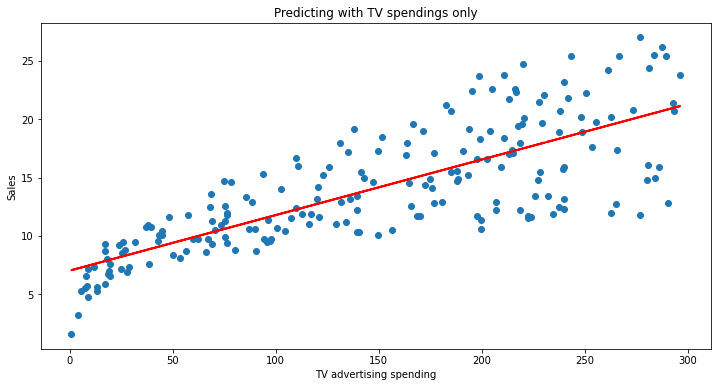

In [95]:
# Predict values
TV_pred = model.predict()

# Plot regression against actual data - What do we see?
plt.figure(figsize=(12, 6))
plt.plot(df['TV'], df['Sales'], 'o')           # scatter plot showing actual data
plt.plot(df['TV'], TV_pred, 'r', linewidth=2)   # regression line
plt.xlabel('TV advertising spending')
plt.ylabel('Sales')
plt.title('Predicting with TV spendings only')

plt.show()

In [96]:
# Answer the second question: Can Radio advertising spending predict the number of sales for the product?
import statsmodels.formula.api as smf

# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Sales ~ Radio', data=df)
model = model.fit()
print(model.params)

Intercept    9.311638
Radio        0.202496
dtype: float64


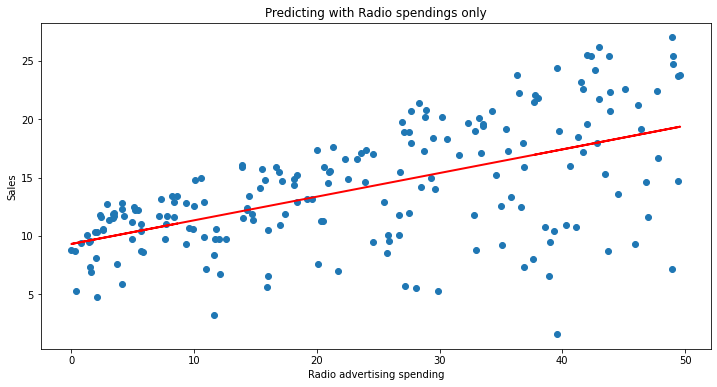

In [97]:
# Predict values
RADIO_pred = model.predict()

# Plot regression against actual data - What do we see?
plt.figure(figsize=(12, 6))
plt.plot(df['Radio'], df['Sales'], 'o')           # scatter plot showing actual data
plt.plot(df['Radio'], RADIO_pred, 'r', linewidth=2)   # regression line
plt.xlabel('Radio advertising spending')
plt.ylabel('Sales')
plt.title('Predicting with Radio spendings only')

plt.show()

## EXERCISE 1 : Do the same process for newspaper advertising

In [1]:
# Answer the third question: Can Newspaper advertising spending predict the number of sales for the product? 


In [2]:
# Predict values

# Plot regression against actual data - What do we see?


### `sklearn` package

On my computer I had to install the sklearn package for the next step using:
`!sudo /opt/jupyterhub/bin/pip install sklearn`

Anaconda users will execute a similar command for either their notebook (with the ! symbol) or from the Anaconda Power Prompt.

In [100]:
# Answer the fourth question: Can we use the three of them to predict the number of sales for the product?
# This is a case of multiple linear regression model. This is simply a linear regression model with more than one predictor:
# and is modelled by:  Yₑ = α + β₁X₁ + β₂X₂ + … + βₚXₚ , where p is the number of predictors.
# In this case: Sales = α + β1*TV + β2*Radio + β3*Newspaper
# Multiple Linear Regression with scikit-learn:
from sklearn.linear_model import LinearRegression

# Build linear regression model using TV,Radio and Newspaper as predictors
# Split data into predictors X and output Y
predictors = ['TV', 'Radio', 'Newspaper']
X = df[predictors]
y = df['Sales']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [101]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 2.9388893694594014
betas = [ 0.04576465  0.18853002 -0.00103749]


In [102]:
# Therefore, our model can be written as:
#Sales = 2.938 + 0.046*TV + 0.1885*Radio -0.001*Newspaper
# we can predict sales from any combination of TV and Radio and Newspaper advertising costs! 
#For example, if we wanted to know how many sales we would make if we invested 
# $300 in TV advertising and $200 in Radio advertising and $50 in Newspaper advertising
#all we have to do is plug in the values:
import warnings
warnings.filterwarnings('ignore')
new_X = [[300, 200,50]]
print(model.predict(new_X))

[54.32241174]


## EXERCISE 2 : See the below cell

In [103]:
# Answer the final question : Which parameter is a better predictor of the number of sales for the product?
# How can we answer that?
# WHAT CAN WE INFER FROM THE BETAs ?


<hr>

## References

*This notebook was inspired by a several blogposts including:* 
- __"Introduction to Linear Regression in Python"__ by __Lorraine Li__ available at* https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0 <br>
- __"In Depth: Linear Regression"__ available at* https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html <br>
- __"A friendly introduction to linear regression (using Python)"__ available at* https://www.dataschool.io/linear-regression-in-python/ <br>

*Here are some great reads on linear regression:* 
- __"Linear Regression in Python"__ by __Sadrach Pierre__ available at* https://towardsdatascience.com/linear-regression-in-python-a1d8c13f3242 <br>
- __"Introduction to Linear Regression in Python"__ available at* https://cmdlinetips.com/2019/09/introduction-to-linear-regression-in-python/ <br>
- __"Linear Regression in Python"__ by __Mirko Stojiljković__ available at* https://realpython.com/linear-regression-in-python/ <br>

*Here are some great videos on linear regression:* 
- __"StatQuest: Fitting a line to data, aka least squares, aka linear regression."__ by __StatQuest with Josh Starmer__ available at* https://www.youtube.com/watch?v=PaFPbb66DxQ&list=PLblh5JKOoLUIzaEkCLIUxQFjPIlapw8nU <br>
- __"Statistics 101: Linear Regression, The Very Basics"__ by __Brandon Foltz__ available at* https://www.youtube.com/watch?v=ZkjP5RJLQF4 <br>
- __"How to Build a Linear Regression Model in Python | Part 1" and 2,3,4!__ by __Sigma Coding__ available at* https://www.youtube.com/watch?v=MRm5sBfdBBQ <br>